In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lead_data = pd.read_csv("C:\Dibyarun Dhar\PGDM DS\Log Reg Case study\Leads.csv")

In [3]:
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
lead_data = lead_data.replace('Select', np.nan)

In [8]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
(lead_data.isnull().sum()/len(lead_data.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [11]:
(lead_data.isnull().sum()/len(lead_data.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

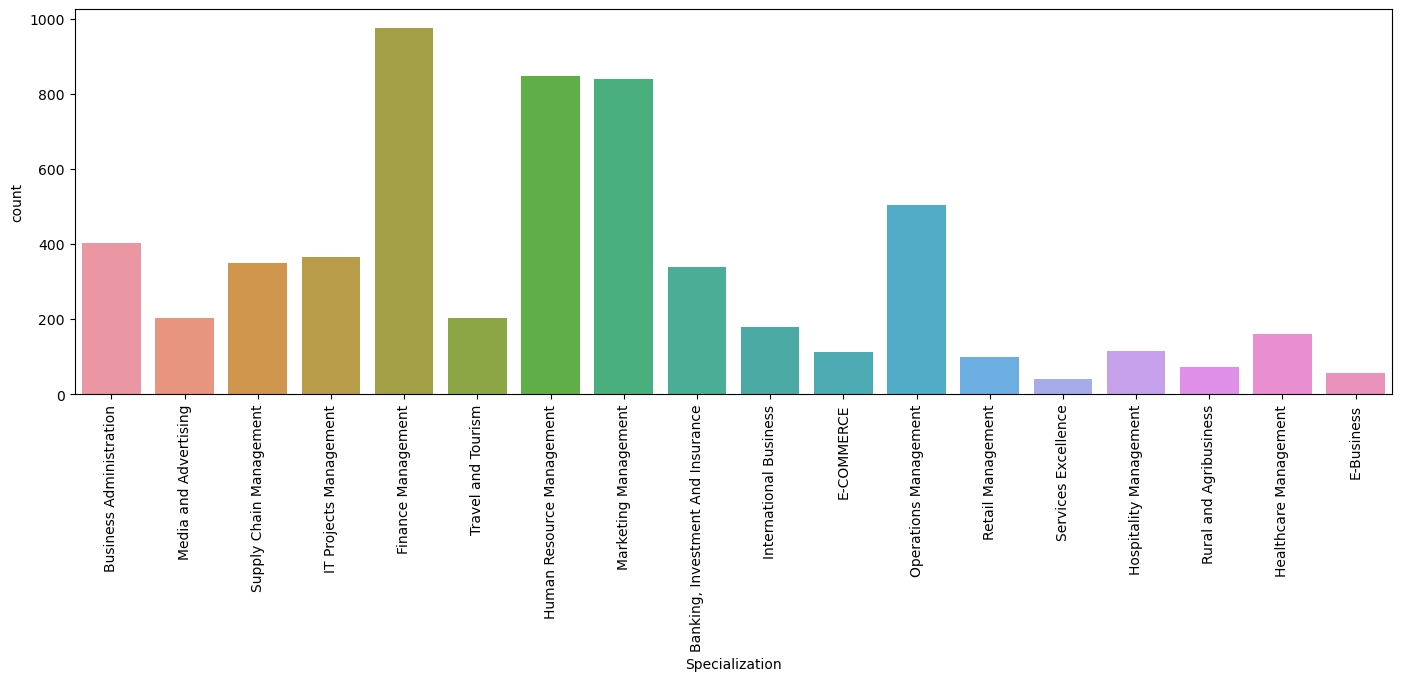

In [12]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

In [13]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

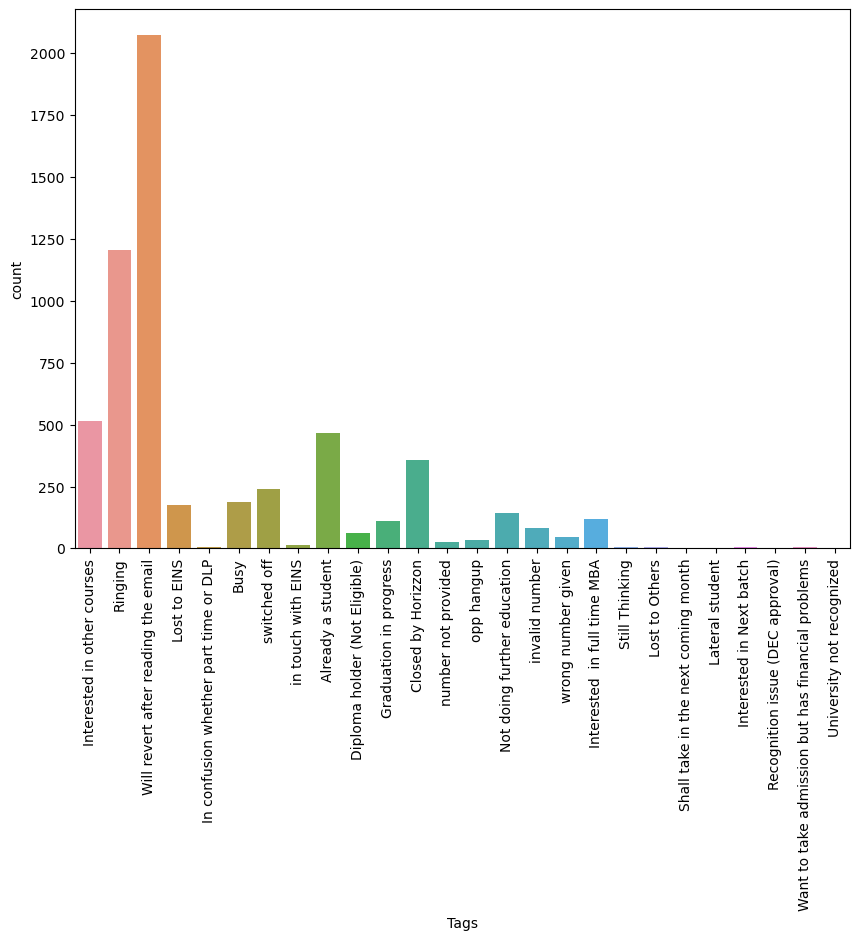

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

In [15]:
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

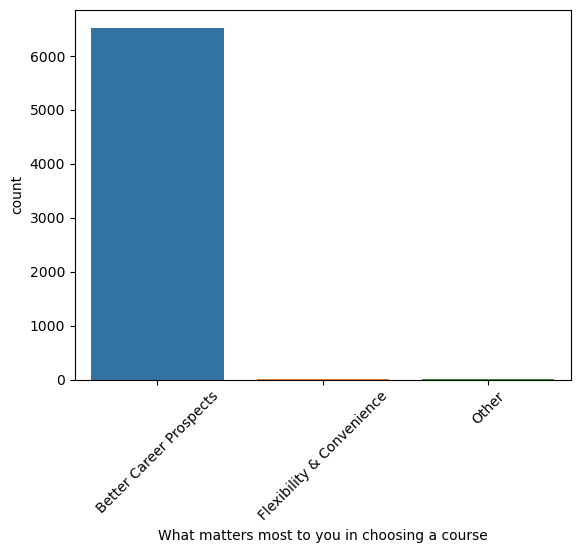

In [16]:
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [17]:
(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True))*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

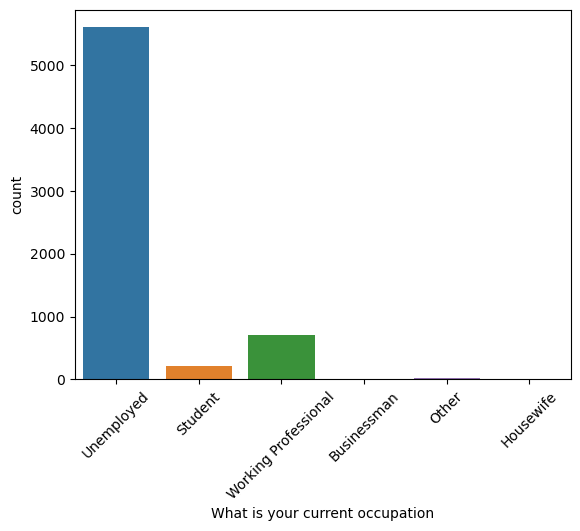

In [19]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [20]:
(lead_data['What is your current occupation'].value_counts(normalize=True))*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [21]:
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

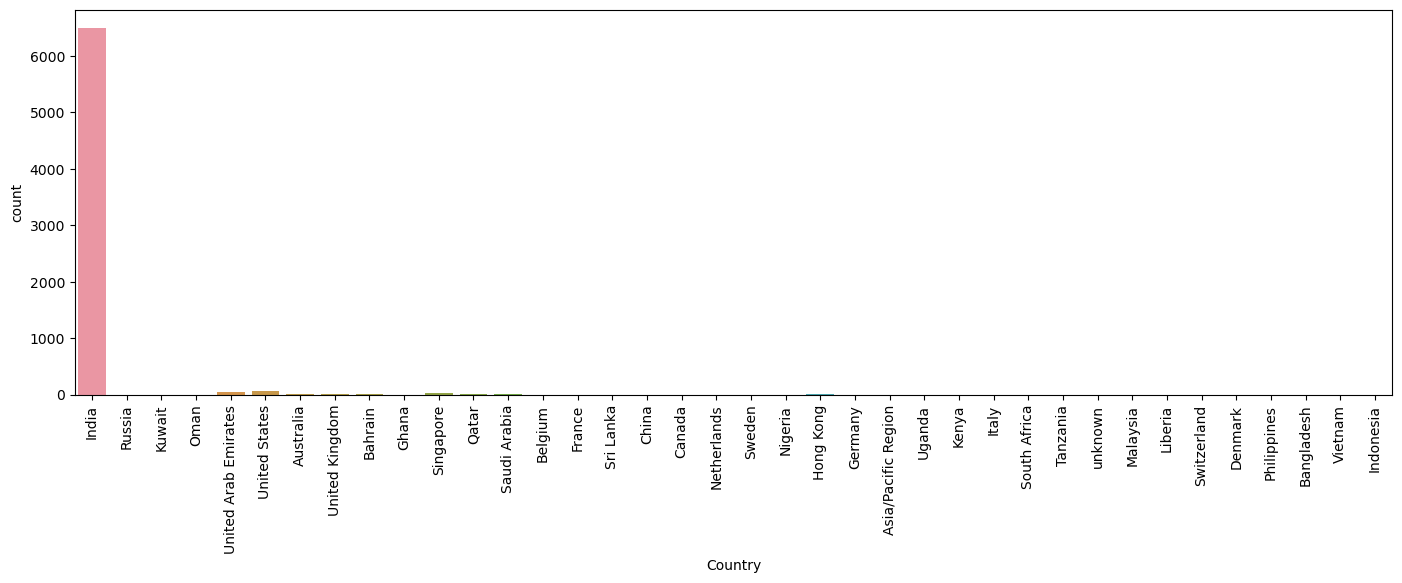

In [22]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

In [23]:
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

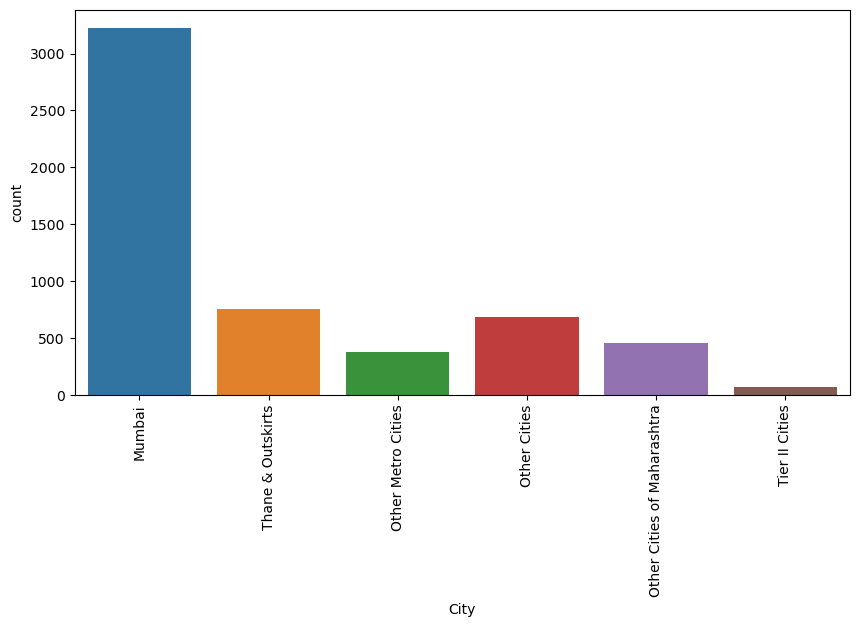

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

In [25]:
(lead_data['City'].value_counts(normalize=True))*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [26]:
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [27]:
(lead_data.isnull().sum()/len(lead_data.index))*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

In [28]:
lead_data.dropna(inplace = True)

In [29]:
(lead_data.isnull().sum()/len(lead_data.index))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [30]:
(len(lead_data.index)/9240)*100

98.2034632034632

In [31]:
lead_data[lead_data.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, What is your current occupation, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 29 columns]

In [32]:
Successful = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Successful

37.85541106458012

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

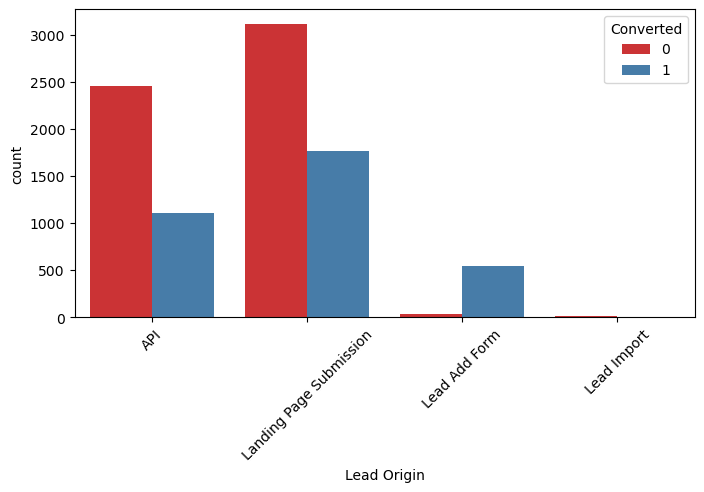

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

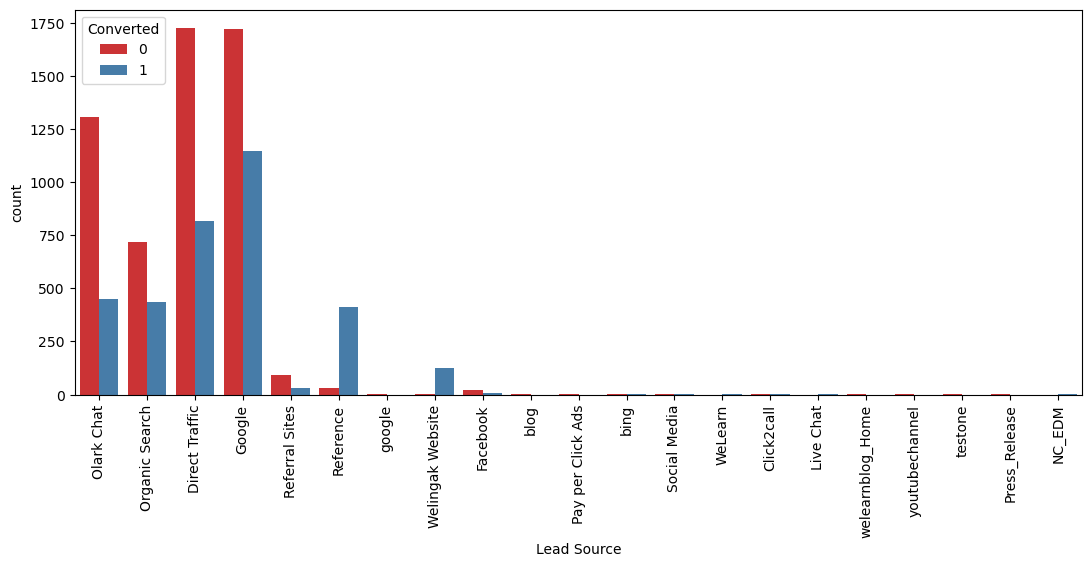

In [34]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [35]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Others')])

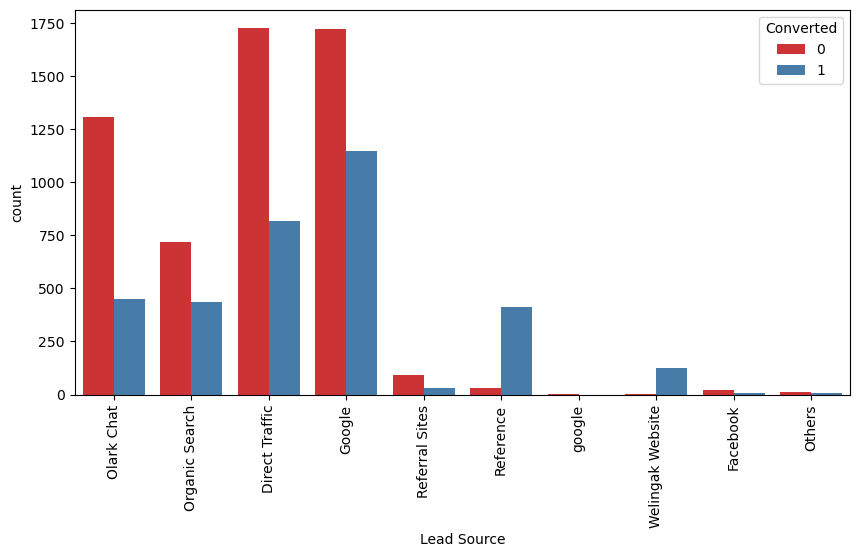

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

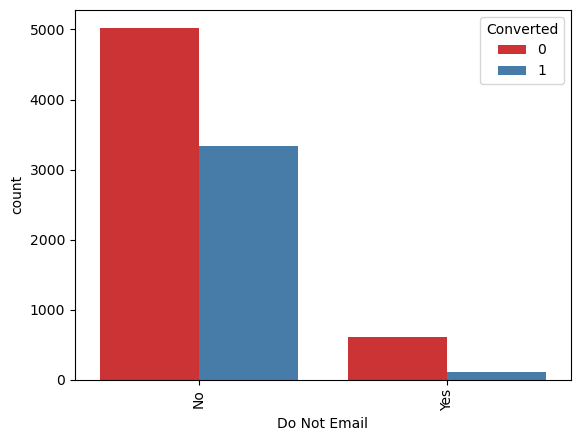

In [37]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

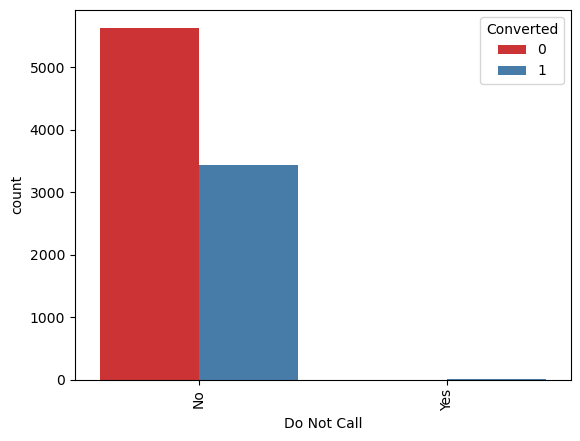

In [38]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91974\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='TotalVisits'>

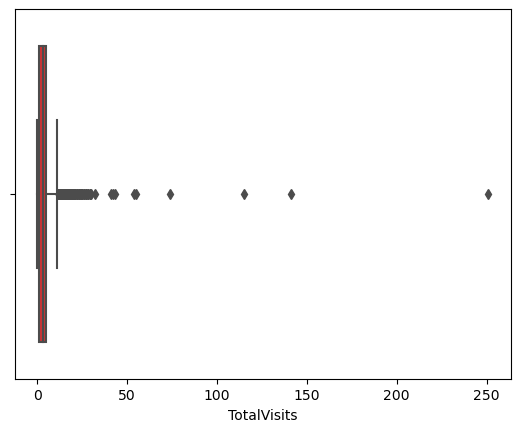

In [39]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91974\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Total Time Spent on Website'>

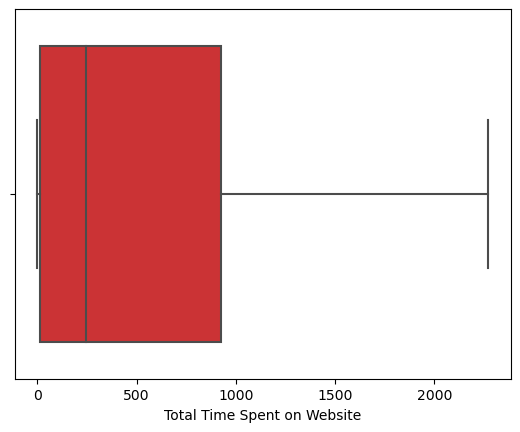

In [40]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

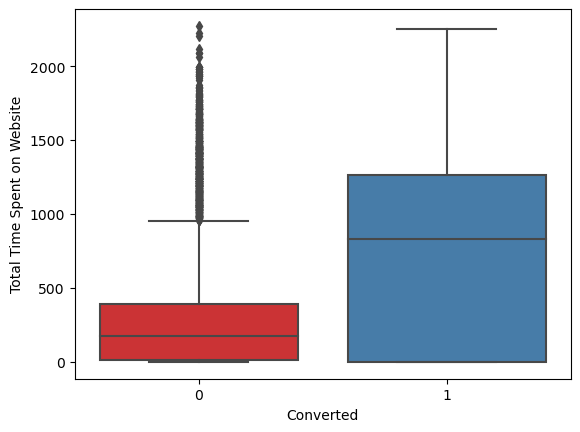

In [41]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91974\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Page Views Per Visit'>

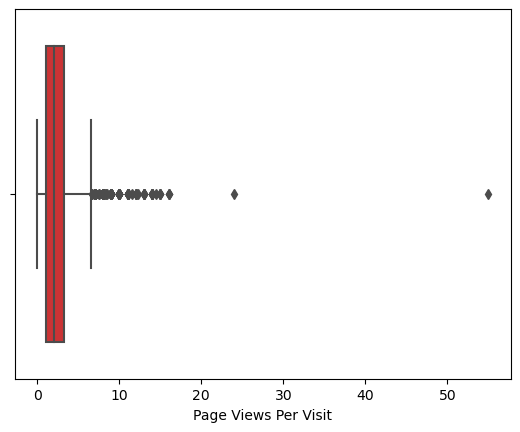

In [42]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')


C:\Users\91974\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91974\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Page Views Per Visit'>

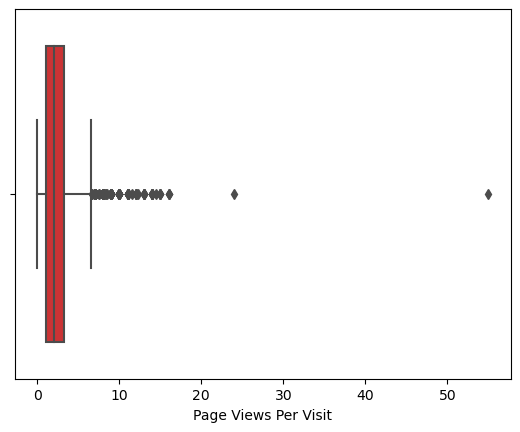

In [43]:
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

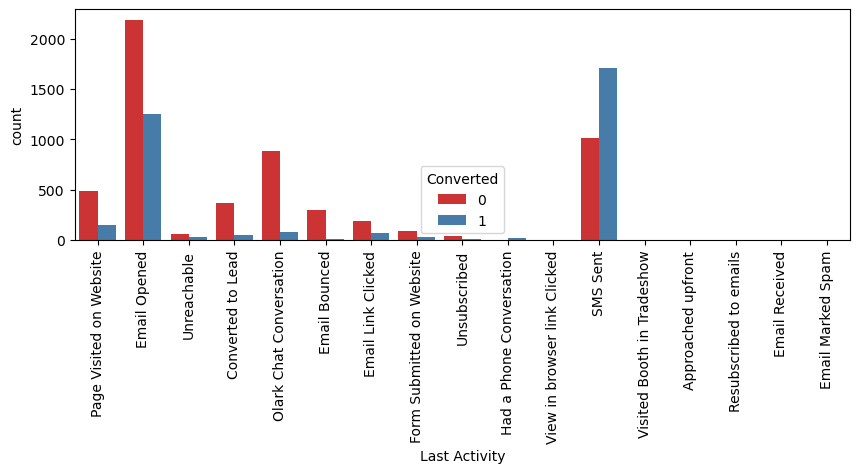

In [44]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [45]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

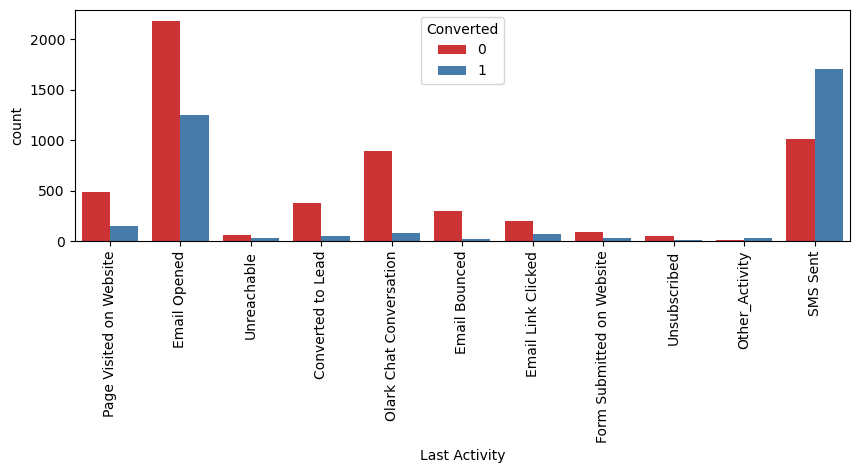

In [46]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

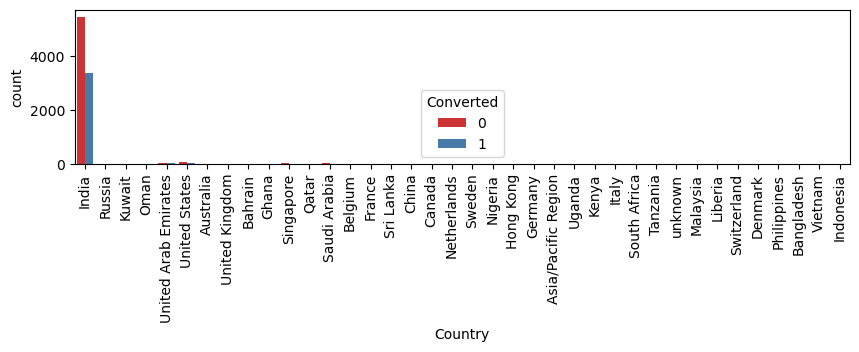

In [47]:
plt.figure(figsize=(10,2))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

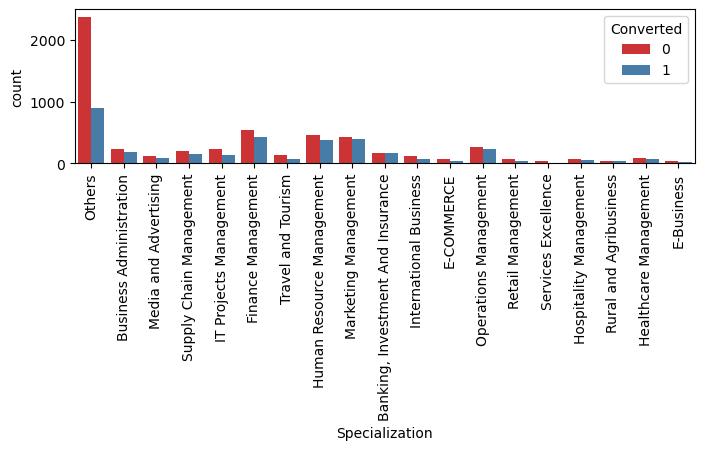

In [48]:
plt.figure(figsize=(8,2))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

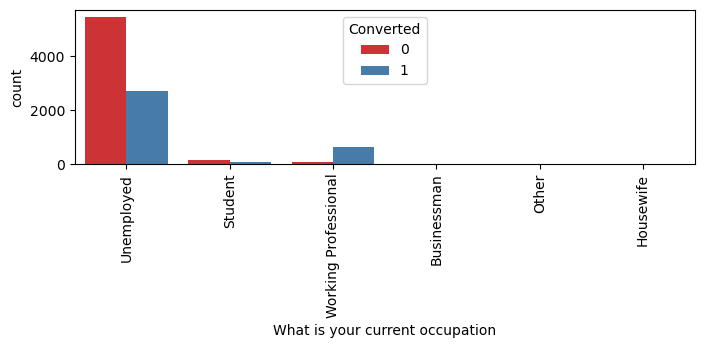

In [49]:
plt.figure(figsize=(8,2))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

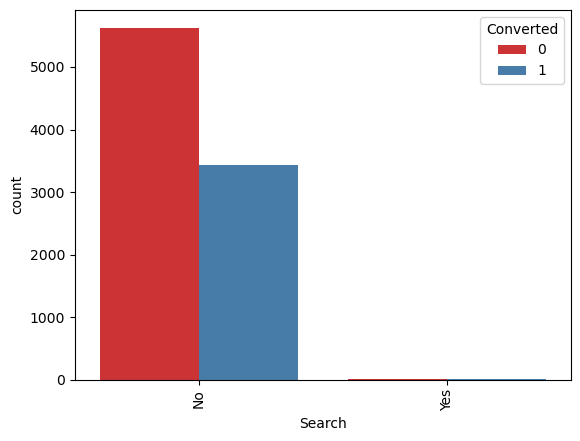

In [50]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

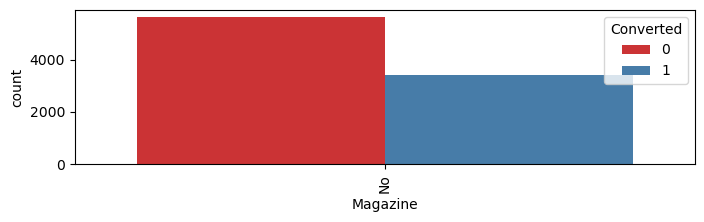

In [51]:
plt.figure(figsize=(8,2))
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

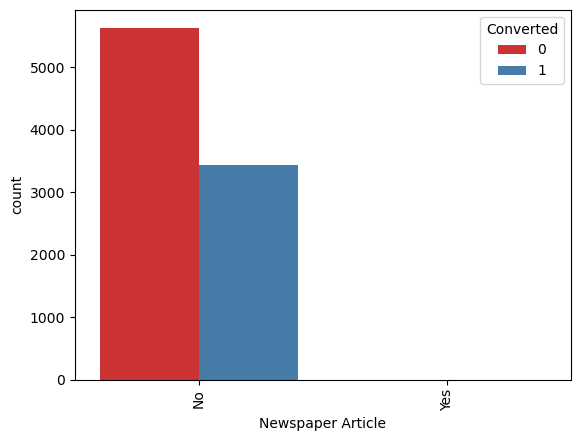

In [52]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

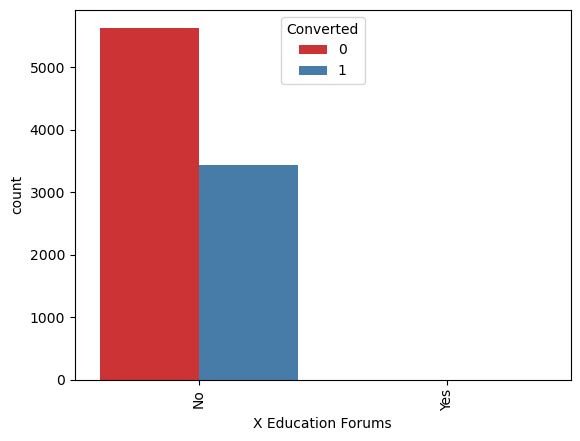

In [53]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

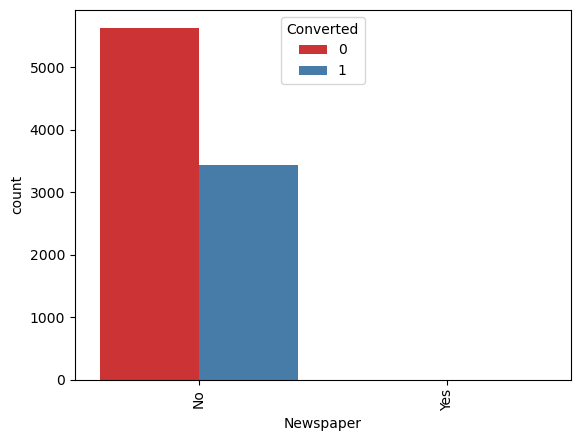

In [54]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

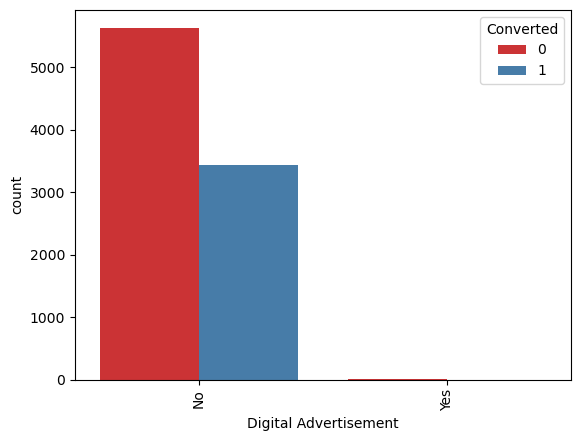

In [55]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

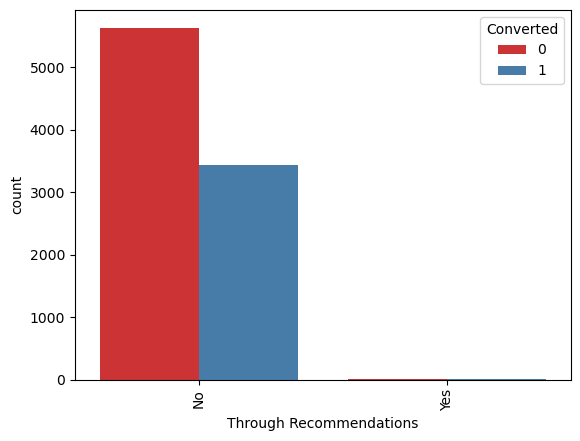

In [56]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

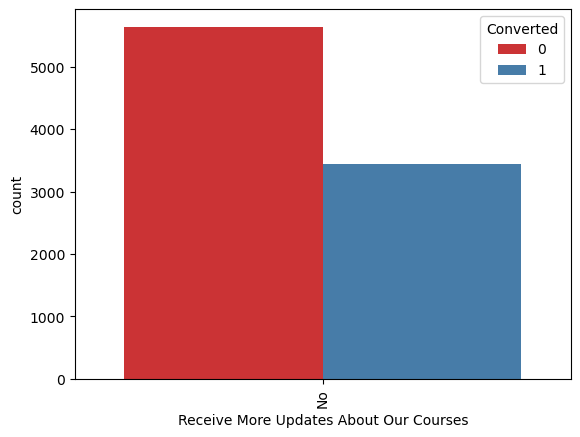

In [57]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

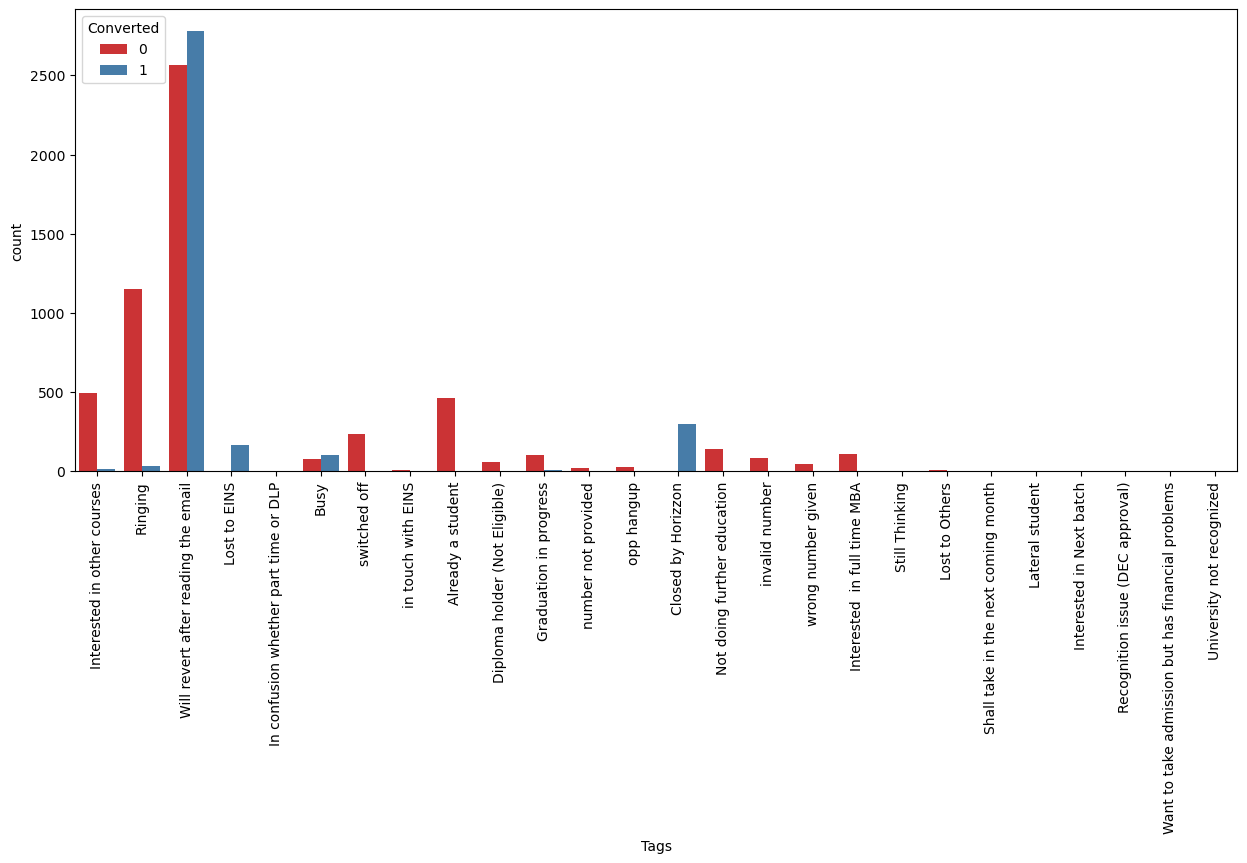

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

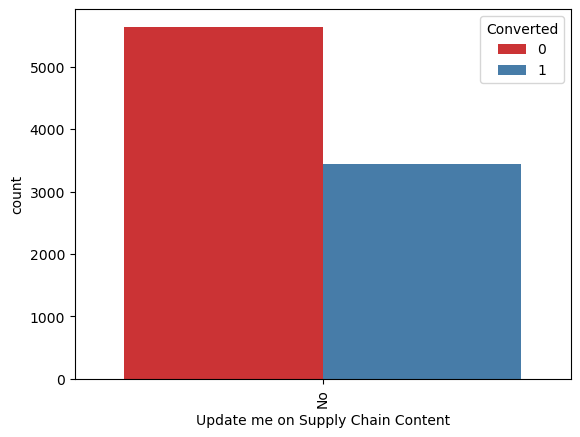

In [59]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

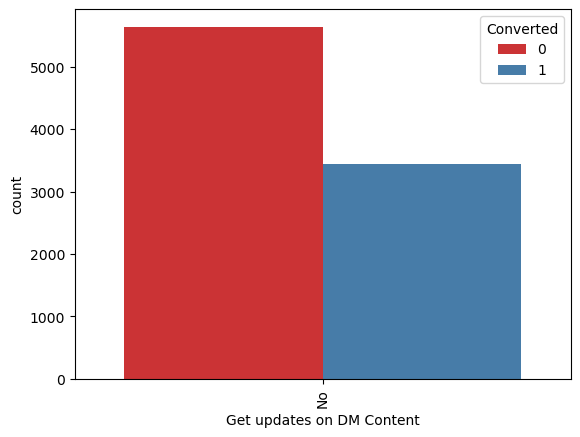

In [60]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

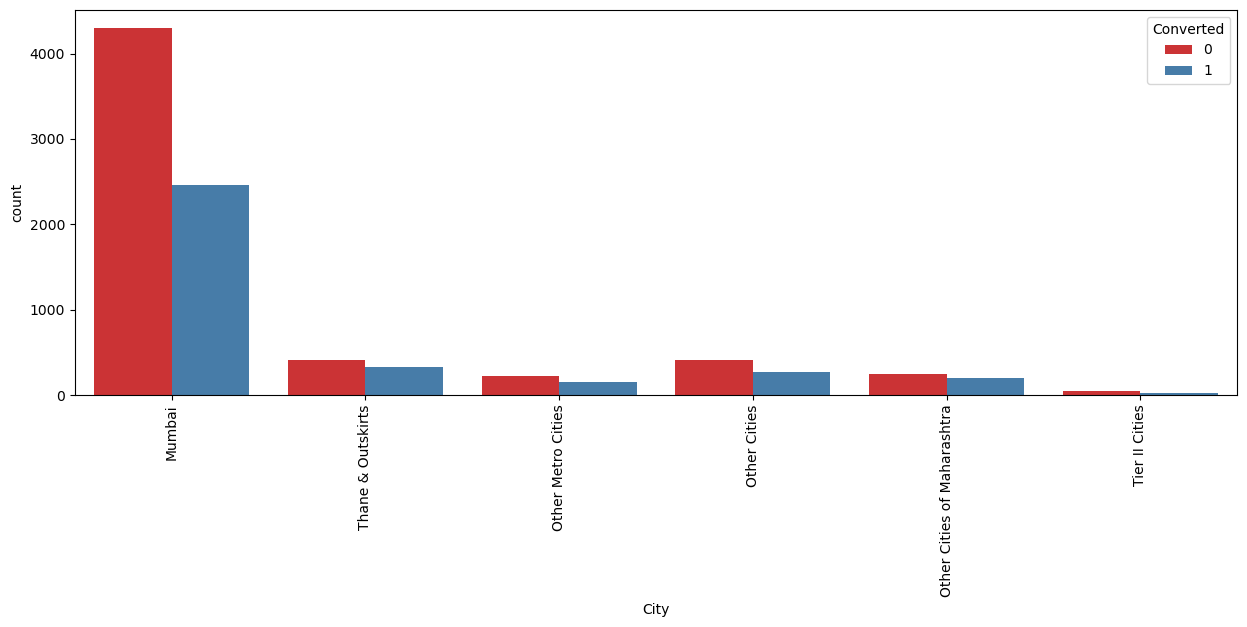

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

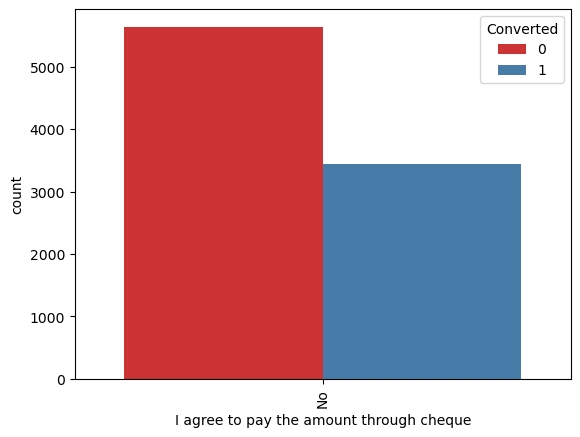

In [62]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

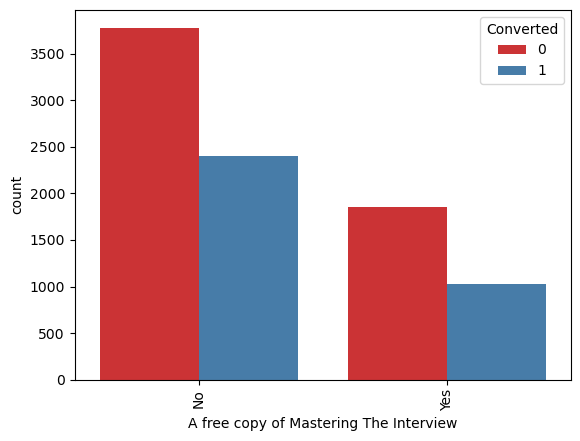

In [63]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

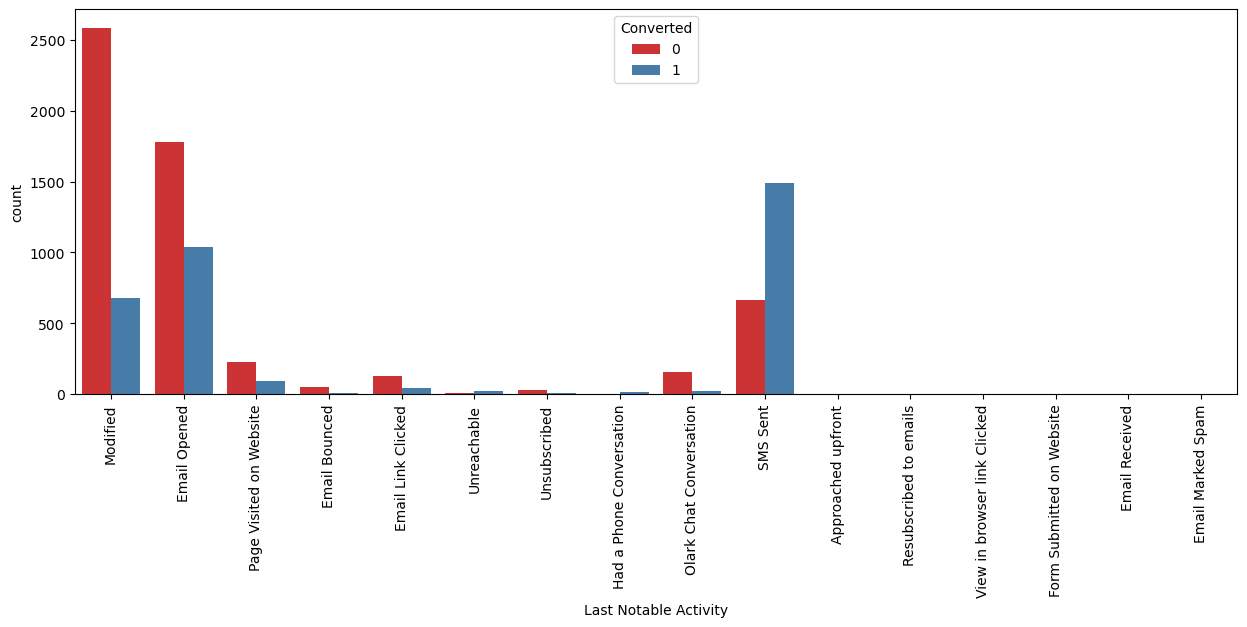

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [65]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

C:\Users\91974\AppData\Local\Temp\ipykernel_7640\782954014.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',


In [66]:
lead_data.shape

(9074, 14)

In [67]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [68]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [69]:
lead_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  \
0                   Others                      Unemployed  Mumbai   
1                   Others                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                   Others                      Unemployed  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [70]:
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [71]:
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Last Notable Activity_Form Submitted on Website  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   
3  ...                                               0   
4  ...                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                            

In [72]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [73]:
lead_data.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Acti

In [74]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0           

In [75]:
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.284595                    -0.160255   
1012             1            0    -0.284595                    -0.540048   
9226             0            0    -0.671384                    -0.888650   
4750             0            0    -0.284595                     1.643304   
7987             0            0     0.295588                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.179666                                    1   
1012             -0.179666                                    1   
9226             -1.132538                                    0   
4750             -0.179666                                    1   
7987              0.058552                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                               0                                  0   

      Last Notable Activity_Unsubscribed  \
3009                                   0   
1

In [80]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

In [99]:
cols = X_train.columns[rfe.support_]
cols

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[cols])
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activit

In [ ]:
import statsmodels.api as sm

In [100]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.3
Date:                Sat, 01 Jul 2023   Deviance:                       5130.5
Time:                        18:11:18   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4141      1.705      0.829      0.407      -1.927       4.756
Do Not Email                                            -1.6468      0.211     -7.812      0.000      -2.060      -1.234
Do Not Call                                             21.6152    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1092      0.041     26.967      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1168      0.131     -8.544      0.000      -1.373      -0.861
Lead Origin_Lead Add Form                                1.4799      0.894      1.656      0.098      -0.272       3.231
Lead Origin_Lead Import                                  0.9062      0.477      1.901      0.057      -0.028       1.841
Lead Source_Olark Chat                                   1.1013      0.125      8.835      0.000       0.857       1.346
Lead Source_Reference                                    1.8426      0.918      2.008      0.045       0.044       3.641
Lead Source_Welingak Website                             4.4147      1.150      3.839      0.000       2.161       6.669
Last Activity_Email Link Clicked                         0.6809      0.411      1.655      0.098      -0.125       1.487
Last Activity_Email Opened                               0.8879      0.216      4.109      0.000       0.464       1.311
Last Activity_Olark Chat Conversation                   -0.3961      0.253     -1.568      0.117      -0.891       0.099
Last Activity_Other_Activity                             2.3758      0.613      3.878      0.000       1.175       3.577
Last Activity_Page Visited on Website                    0.5746      0.265      2.171      0.030       0.056       1.093
Last Activity_SMS Sent                                   1.3393      0.218      6.147      0.000       0.912       1.766
Last Activity_Unreachable                                0.5229      0.521      1.004      0.315      -0.498       1.544
Last Activity_Unsubscribed                               1.6125      1.130      1.427      0.154      -0.602       3.827
Specialization_Hospitality Management                   -0.4176      0.329     -1.269      0.205      -1.063       0.228
Specialization_Others                                   -1.1448      0.127     -9.015      0.000      -1.394      -0.896
What is your current occupation_Housewife               21.7994   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5202      0.678     -0.768      0.443      -1.848       0.808
What is your current occupation_Unemployed              -0

In [102]:
col1 = cols.drop('What is your current occupation_Housewife')

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.3
Date:                Sat, 01 Jul 2023   Deviance:                       5134.6
Time:                        18:12:01   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9082      1.687      1.131      0.258      -1.398       5.215
Do Not Email                                            -1.6508      0.211     -7.823      0.000      -2.064      -1.237
Do Not Call                                             20.6191      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1081      0.041     26.959      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1098      0.131     -8.499      0.000      -1.366      -0.854
Lead Origin_Lead Add Form                                1.4833      0.893      1.660      0.097      -0.268       3.234
Lead Origin_Lead Import                                  0.9077      0.477      1.904      0.057      -0.026       1.842
Lead Source_Olark Chat                                   1.1014      0.125      8.837      0.000       0.857       1.346
Lead Source_Reference                                    1.8450      0.917      2.011      0.044       0.047       3.643
Lead Source_Welingak Website                             4.4122      1.150      3.837      0.000       2.159       6.666
Last Activity_Email Link Clicked                         0.6820      0.411      1.658      0.097      -0.124       1.488
Last Activity_Email Opened                               0.8886      0.216      4.114      0.000       0.465       1.312
Last Activity_Olark Chat Conversation                   -0.3974      0.253     -1.572      0.116      -0.893       0.098
Last Activity_Other_Activity                             2.3768      0.613      3.880      0.000       1.176       3.577
Last Activity_Page Visited on Website                    0.5632      0.265      2.127      0.033       0.044       1.082
Last Activity_SMS Sent                                   1.3396      0.218      6.150      0.000       0.913       1.766
Last Activity_Unreachable                                0.5232      0.521      1.004      0.315      -0.498       1.544
Last Activity_Unsubscribed                               1.6150      1.130      1.429      0.153      -0.600       3.830
Specialization_Hospitality Management                   -0.4180      0.329     -1.270      0.204      -1.063       0.227
Specialization_Others                                   -1.1408      0.127     -8.991      0.000      -1.389      -0.892
What is your current occupation_Student                 -1.0211      0.631     -1.618      0.106      -2.258       0.216
What is your current occupation_Unemployed              -1.4669      0.589     -2.490      0.013      -2.621      -0.312
What is your current occupation_Working Professional     1

In [104]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.3
Date:                Sat, 01 Jul 2023   Deviance:                       5134.6
Time:                        18:12:17   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0932      1.178      1.776      0.076      -0.216       4.403
Do Not Email                                            -1.6514      0.211     -7.824      0.000      -2.065      -1.238
Do Not Call                                             20.6190      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1080      0.041     26.958      0.000       1.027       1.189
Lead Origin_Landing Page Submission                     -1.1100      0.131     -8.501      0.000      -1.366      -0.854
Lead Origin_Lead Add Form                                1.4831      0.893      1.660      0.097      -0.268       3.234
Lead Origin_Lead Import                                  0.9075      0.477      1.904      0.057      -0.027       1.842
Lead Source_Olark Chat                                   1.1011      0.125      8.835      0.000       0.857       1.345
Lead Source_Reference                                    1.8447      0.917      2.011      0.044       0.047       3.643
Lead Source_Welingak Website                             4.4123      1.150      3.837      0.000       2.159       6.666
Last Activity_Email Link Clicked                         0.6831      0.411      1.661      0.097      -0.123       1.489
Last Activity_Email Opened                               0.8897      0.216      4.120      0.000       0.466       1.313
Last Activity_Olark Chat Conversation                   -0.3962      0.253     -1.568      0.117      -0.892       0.099
Last Activity_Other_Activity                             2.3911      0.605      3.952      0.000       1.205       3.577
Last Activity_Page Visited on Website                    0.5642      0.265      2.132      0.033       0.045       1.083
Last Activity_SMS Sent                                   1.3406      0.218      6.157      0.000       0.914       1.767
Last Activity_Unreachable                                0.5242      0.521      1.006      0.314      -0.497       1.545
Last Activity_Unsubscribed                               1.6164      1.130      1.431      0.153      -0.598       3.831
Specialization_Hospitality Management                   -0.4180      0.329     -1.270      0.204      -1.063       0.227
Specialization_Others                                   -1.1410      0.127     -8.993      0.000      -1.390      -0.892
What is your current occupation_Student                 -1.0210      0.631     -1.618      0.106      -2.258       0.216
What is your current occupation_Unemployed              -1.4669      0.589     -2.490      0.013      -2.621      -0.312
What is your current occupation_Working Professional     1

In [106]:
col1 = col1.drop('What is your current occupation_Student')

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.7
Date:                Sat, 01 Jul 2023   Deviance:                       5137.4
Time:                        18:12:30   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2259      1.046      1.172      0.241      -0.824       3.276
Do Not Email                                            -1.6467      0.211     -7.815      0.000      -2.060      -1.234
Do Not Call                                             20.6047      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1087      0.041     26.984      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1232      0.130     -8.619      0.000      -1.379      -0.868
Lead Origin_Lead Add Form                                1.4764      0.894      1.652      0.098      -0.275       3.228
Lead Origin_Lead Import                                  0.9007      0.477      1.889      0.059      -0.034       1.835
Lead Source_Olark Chat                                   1.0962      0.125      8.802      0.000       0.852       1.340
Lead Source_Reference                                    1.8515      0.917      2.018      0.044       0.053       3.650
Lead Source_Welingak Website                             4.4186      1.150      3.843      0.000       2.165       6.672
Last Activity_Email Link Clicked                         0.6778      0.411      1.648      0.099      -0.128       1.484
Last Activity_Email Opened                               0.8894      0.216      4.120      0.000       0.466       1.313
Last Activity_Olark Chat Conversation                   -0.3928      0.252     -1.556      0.120      -0.888       0.102
Last Activity_Other_Activity                             2.3935      0.605      3.955      0.000       1.207       3.580
Last Activity_Page Visited on Website                    0.5825      0.264      2.204      0.027       0.065       1.100
Last Activity_SMS Sent                                   1.3421      0.218      6.164      0.000       0.915       1.769
Last Activity_Unreachable                                0.5252      0.521      1.008      0.314      -0.496       1.546
Last Activity_Unsubscribed                               1.6148      1.130      1.429      0.153      -0.600       3.830
Specialization_Hospitality Management                   -0.4249      0.329     -1.291      0.197      -1.070       0.220
Specialization_Others                                   -1.1531      0.127     -9.103      0.000      -1.401      -0.905
What is your current occupation_Unemployed              -0.5896      0.213     -2.765      0.006      -1.008      -0.172
What is your current occupation_Working Professional     2.0477      0.285      7.196      0.000       1.490       2.605
City_Tier II Cities                                     -0

In [108]:
col1 = col1.drop('Lead Origin_Lead Add Form')

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.2
Date:                Sat, 01 Jul 2023   Deviance:                       5140.3
Time:                        18:12:49   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2401      1.046      1.186      0.236      -0.810       3.290
Do Not Email                                            -1.6487      0.211     -7.824      0.000      -2.062      -1.236
Do Not Call                                             20.5961      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1066      0.041     26.975      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.1420      0.130     -8.787      0.000      -1.397      -0.887
Lead Origin_Lead Import                                  0.8842      0.477      1.853      0.064      -0.051       1.819
Lead Source_Olark Chat                                   1.0891      0.124      8.763      0.000       0.846       1.333
Lead Source_Reference                                    3.3133      0.244     13.596      0.000       2.836       3.791
Lead Source_Welingak Website                             5.8862      0.731      8.053      0.000       4.454       7.319
Last Activity_Email Link Clicked                         0.6769      0.411      1.646      0.100      -0.129       1.483
Last Activity_Email Opened                               0.8939      0.216      4.141      0.000       0.471       1.317
Last Activity_Olark Chat Conversation                   -0.3953      0.252     -1.566      0.117      -0.890       0.100
Last Activity_Other_Activity                             2.3928      0.605      3.956      0.000       1.207       3.578
Last Activity_Page Visited on Website                    0.5891      0.264      2.234      0.025       0.072       1.106
Last Activity_SMS Sent                                   1.3421      0.218      6.164      0.000       0.915       1.769
Last Activity_Unreachable                                0.5257      0.521      1.009      0.313      -0.495       1.547
Last Activity_Unsubscribed                               1.6162      1.130      1.431      0.153      -0.598       3.830
Specialization_Hospitality Management                   -0.4263      0.329     -1.295      0.195      -1.071       0.219
Specialization_Others                                   -1.1656      0.127     -9.211      0.000      -1.414      -0.918
What is your current occupation_Unemployed              -0.5866      0.213     -2.750      0.006      -1.005      -0.169
What is your current occupation_Working Professional     2.0476      0.285      7.194      0.000       1.490       2.606
City_Tier II Cities                                     -0.5571      0.458     -1.217      0.224      -1.455       0.340
Last Notable Activity_Email Bounced                     -0

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
18         What is your current occupation_Unemployed  34.19
23                 Last Notable Activity_Email Opened  23.36
24                     Last Notable Activity_Modified  21.23
27                     Last Notable Activity_SMS Sent  19.05
9                          Last Activity_Email Opened  10.68
13                             Last Activity_SMS Sent   8.81
3                 Lead Origin_Landing Page Submission   7.27
17                              Specialization_Others   4.67
22           Last Notable Activity_Email Link Clicked   3.99
26      Last Notable Activity_Page Visited on Website   3.96
19  What is your current occupation_Working Profes...   3.93
29                 Last Notable Activity_Unsubscribed   3.83
15                         Last Activity_Unsubscribed   3.64
8                    Last Activity_Email Link Clicked   3.29
10              Last Activity_Olark Chat Conversation   2.98
12              Last Activity_Page Visited on Website   2.81
25      Last Notable Activity_Olark Chat Conversation   2.35
5                              Lead Source_Olark Chat   2.35
28                  Last Notable Activity_Unreachable   1.81
14                          Last Activity_Unreachable   1.73
6                               Lead Source_Reference   1.58
0                                        Do Not Email   1.48
21                Last Notable Activity_Email Bounced   1.48
2                         Total Time Spent on Website   1.34
11                       Last Activity_Other_Activity   1.12
7                        Lead Source_Welingak Website   1.12
4                             Lead Origin_Lead Import   1.03
30  Last Notable Activity_View in browser link Cli...   1.03
20                                City_Tier II Cities   1.02
16              Specialization_Hospitality Management   1.02
1                                         Do Not Call   1.01

In [112]:
col1 = col1.drop('What is your current occupation_Unemployed')

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.9
Date:                Sat, 01 Jul 2023   Deviance:                       5147.7
Time:                        18:13:48   Pearson chi2:                 6.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6616      1.024      0.646      0.518      -1.346       2.669
Do Not Email                                            -1.6408      0.211     -7.779      0.000      -2.054      -1.227
Do Not Call                                             20.5620      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1067      0.041     26.988      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.1464      0.130     -8.814      0.000      -1.401      -0.892
Lead Origin_Lead Import                                  0.8645      0.477      1.812      0.070      -0.071       1.800
Lead Source_Olark Chat                                   1.0949      0.124      8.810      0.000       0.851       1.339
Lead Source_Reference                                    3.3249      0.243     13.660      0.000       2.848       3.802
Lead Source_Welingak Website                             5.8774      0.731      8.041      0.000       4.445       7.310
Last Activity_Email Link Clicked                         0.6900      0.412      1.673      0.094      -0.118       1.498
Last Activity_Email Opened                               0.9024      0.216      4.178      0.000       0.479       1.326
Last Activity_Olark Chat Conversation                   -0.3809      0.252     -1.509      0.131      -0.876       0.114
Last Activity_Other_Activity                             2.3876      0.605      3.946      0.000       1.202       3.573
Last Activity_Page Visited on Website                    0.5990      0.264      2.268      0.023       0.081       1.117
Last Activity_SMS Sent                                   1.3364      0.218      6.136      0.000       0.910       1.763
Last Activity_Unreachable                                0.5153      0.521      0.989      0.323      -0.506       1.537
Last Activity_Unsubscribed                               1.6023      1.130      1.418      0.156      -0.612       3.817
Specialization_Hospitality Management                   -0.4227      0.330     -1.282      0.200      -1.069       0.224
Specialization_Others                                   -1.1778      0.127     -9.294      0.000      -1.426      -0.929
What is your current occupation_Working Professional     2.6157      0.196     13.315      0.000       2.231       3.001
City_Tier II Cities                                     -0.5712      0.458     -1.248      0.212      -1.468       0.326
Last Notable Activity_Email Bounced                     -0.4764      1.158     -0.411      0.681      -2.747       1.794
Last Notable Activity_Email Link Clicked                -1

In [114]:
col1 = col1.drop('Lead Origin_Lead Import')

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.4
Date:                Sat, 01 Jul 2023   Deviance:                       5150.8
Time:                        18:14:15   Pearson chi2:                 6.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6936      1.024      0.678      0.498      -1.313       2.700
Do Not Email                                            -1.6404      0.211     -7.779      0.000      -2.054      -1.227
Do Not Call                                             20.5476      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.0994      0.041     26.991      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1819      0.129     -9.175      0.000      -1.434      -0.929
Lead Source_Olark Chat                                   1.0691      0.123      8.673      0.000       0.828       1.311
Lead Source_Reference                                    3.2903      0.243     13.562      0.000       2.815       3.766
Lead Source_Welingak Website                             5.8523      0.731      8.009      0.000       4.420       7.284
Last Activity_Email Link Clicked                         0.6903      0.412      1.675      0.094      -0.117       1.498
Last Activity_Email Opened                               0.9095      0.216      4.214      0.000       0.486       1.333
Last Activity_Olark Chat Conversation                   -0.3814      0.252     -1.511      0.131      -0.876       0.113
Last Activity_Other_Activity                             2.3868      0.604      3.950      0.000       1.203       3.571
Last Activity_Page Visited on Website                    0.6001      0.264      2.273      0.023       0.083       1.117
Last Activity_SMS Sent                                   1.3453      0.218      6.182      0.000       0.919       1.772
Last Activity_Unreachable                                0.5165      0.521      0.991      0.321      -0.505       1.537
Last Activity_Unsubscribed                               1.6016      1.129      1.419      0.156      -0.611       3.814
Specialization_Hospitality Management                   -0.4253      0.330     -1.290      0.197      -1.071       0.221
Specialization_Others                                   -1.1996      0.127     -9.481      0.000      -1.448      -0.952
What is your current occupation_Working Professional     2.6161      0.196     13.322      0.000       2.231       3.001
City_Tier II Cities                                     -0.5695      0.457     -1.246      0.213      -1.465       0.326
Last Notable Activity_Email Bounced                     -0.4735      1.158     -0.409      0.683      -2.743       1.796
Last Notable Activity_Email Link Clicked                -1.9103      1.105     -1.730      0.084      -4.075       0.254
Last Notable Activity_Email Opened                      -1

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
21                 Last Notable Activity_Email Opened  13.13
25                     Last Notable Activity_SMS Sent  10.89
8                          Last Activity_Email Opened  10.67
22                     Last Notable Activity_Modified   8.96
12                             Last Activity_SMS Sent   8.78
3                 Lead Origin_Landing Page Submission   7.15
16                              Specialization_Others   4.64
27                 Last Notable Activity_Unsubscribed   3.68
14                         Last Activity_Unsubscribed   3.64
20           Last Notable Activity_Email Link Clicked   3.35
7                    Last Activity_Email Link Clicked   3.29
9               Last Activity_Olark Chat Conversation   2.98
11              Last Activity_Page Visited on Website   2.81
24      Last Notable Activity_Page Visited on Website   2.78
4                              Lead Source_Olark Chat   2.32
13                          Last Activity_Unreachable   1.73
23      Last Notable Activity_Olark Chat Conversation   1.72
26                  Last Notable Activity_Unreachable   1.68
5                               Lead Source_Reference   1.56
0                                        Do Not Email   1.48
2                         Total Time Spent on Website   1.33
17  What is your current occupation_Working Profes...   1.24
19                Last Notable Activity_Email Bounced   1.22
6                        Lead Source_Welingak Website   1.12
10                       Last Activity_Other_Activity   1.06
28  Last Notable Activity_View in browser link Cli...   1.03
18                                City_Tier II Cities   1.02
15              Specialization_Hospitality Management   1.02
1                                         Do Not Call   1.01

In [120]:
col1 = col1.drop('Last Activity_Unsubscribed')

KeyError: "['Last Activity_Unsubscribed'] not found in axis"

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary(

SyntaxError: unexpected EOF while parsing (309026174.py, line 4)